In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [140]:
df = pd.read_csv("Stores.csv")

In [141]:
df = pd.read_csv(r"C:\Users\User\Desktop\Эконометрика\may-\Stores.csv")

In [142]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [143]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [144]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

Подготовка к анализу 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [146]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [147]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [148]:
to_numeric = ['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']

In [149]:
df['Daily_Customer_Count'].values

array([ 530,  210,  720,  620,  450,  760, 1030, 1020,  680, 1130, 1090,
        720, 1050, 1160,  770,  790, 1440,  670, 1030,  980,  370,  690,
        950,  620,  840,  820, 1100,  980,  710,  650,  990,  990,  880,
        620, 1020,  700,  610, 1080, 1010,   10, 1250,  600,  730,  780,
        520,  870,  690,  910, 1260, 1040,  910, 1300,  320,  530,  980,
        740, 1240, 1080, 1080,  460,  300,  530,  600,  860,  590,  920,
        570,  290,  650,  710,  850,  530,  630,  700,  650,  720,  450,
       1390,  960,  600,  620, 1020,  330, 1410, 1200,  280,  940,  850,
        960,  420,  830,  600,  400,  760, 1470,  500, 1120, 1160,  820,
       1140,  900,  760, 1170, 1080, 1000,  690,  810,  630,  650,  920,
       1260,  800, 1330,  940, 1210,  660,  770,  460,  860,  780,  890,
        900,  530,  790,  370,  610,  500,  750,  980,  530,  910,  620,
       1170,  900,  980,  740,  810,  810,  300,  790,  800,  760,  530,
        540,  620, 1010,  130,  730,  830, 1060,  7

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Описательная статистика 

In [151]:
df.describe() 

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

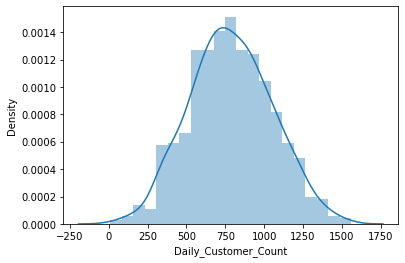

In [152]:
sns.distplot(df['Daily_Customer_Count'])

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Sales', ylabel='Density'>

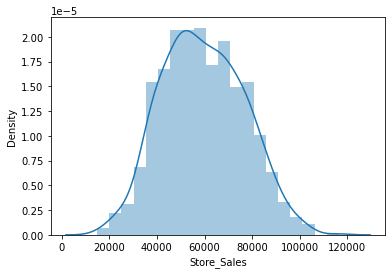

In [153]:
sns.distplot(df['Store_Sales'])

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

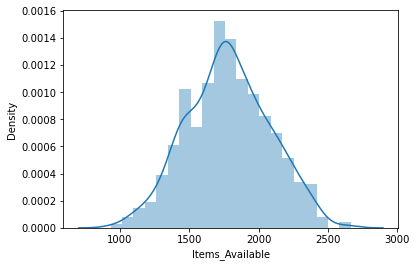

In [154]:
sns.distplot(df['Items_Available'])

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Area', ylabel='Density'>

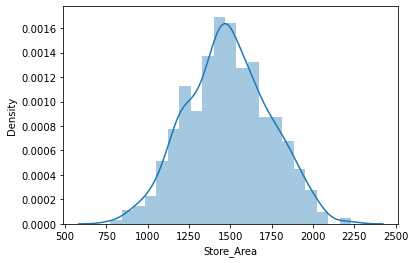

In [155]:
sns.distplot(df['Store_Area'])

<Figure size 1152x864 with 0 Axes>

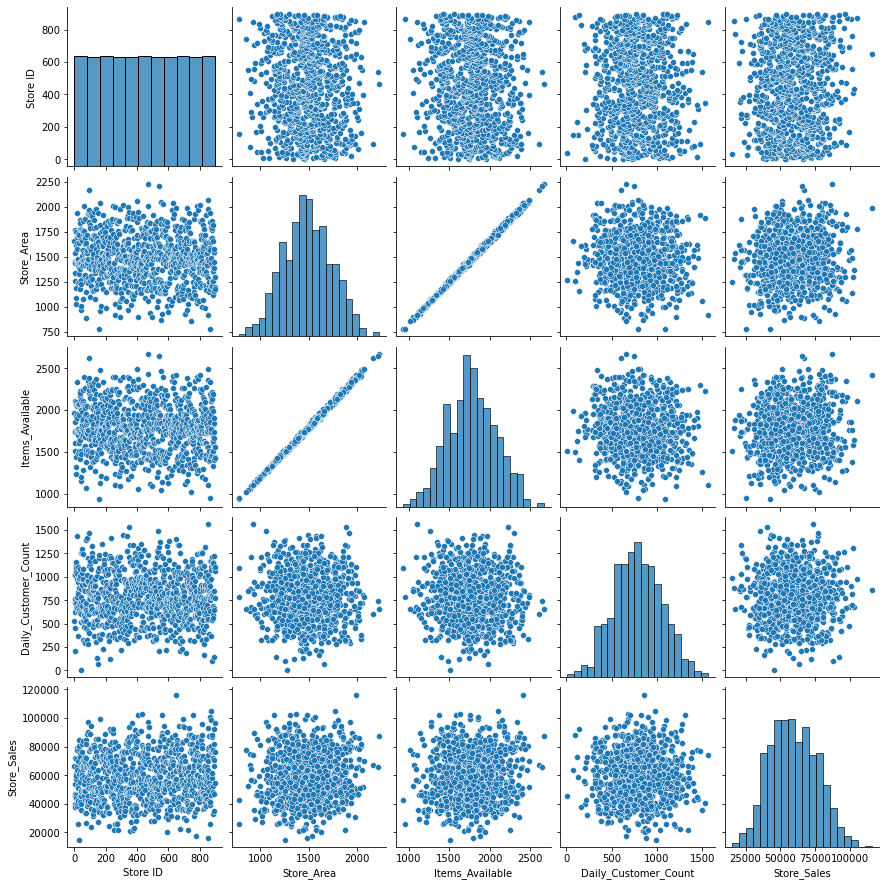

In [156]:
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.show()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [158]:
df_new = df.drop(['Daily_Customer_Count','Store_Sales'], axis=1) 

In [159]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Store ID         896 non-null    int64
 1   Store_Area       896 non-null    int64
 2   Items_Available  896 non-null    int64
dtypes: int64(3)
memory usage: 21.1 KB


По данной модели мы можем сказать что чем больше размер магазина тем больше товаров, следовательно они полностью коррелируют --- значит это плохо 
Поэтому мы взяли другую подель (модель взаимосвязи посетителей и количеством товаров )

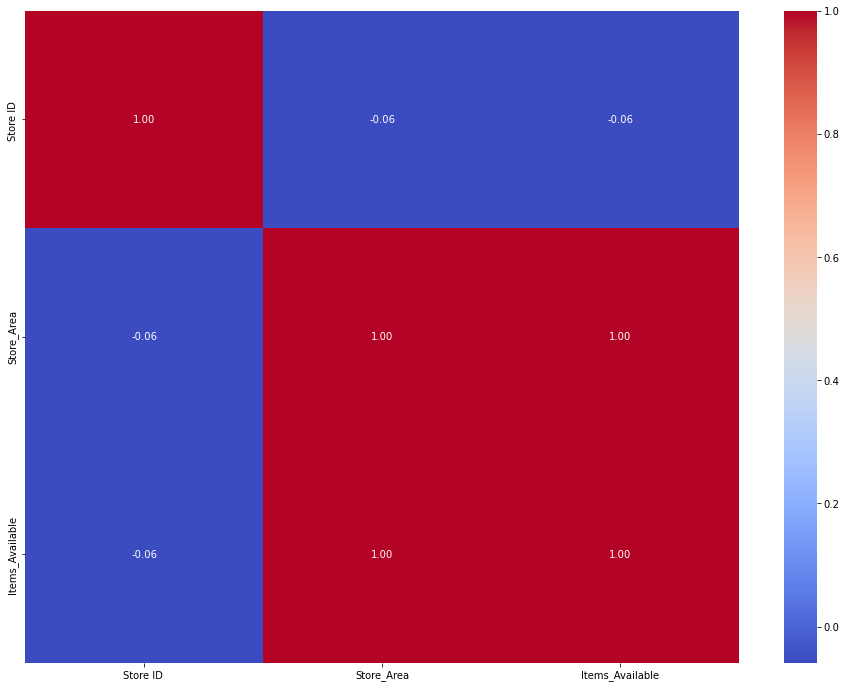

In [160]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [161]:
df_new2 = df.drop(['Store_Area','Items_Available'], axis=1) 

In [162]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Daily_Customer_Count  896 non-null    int64
 2   Store_Sales           896 non-null    int64
dtypes: int64(3)
memory usage: 21.1 KB


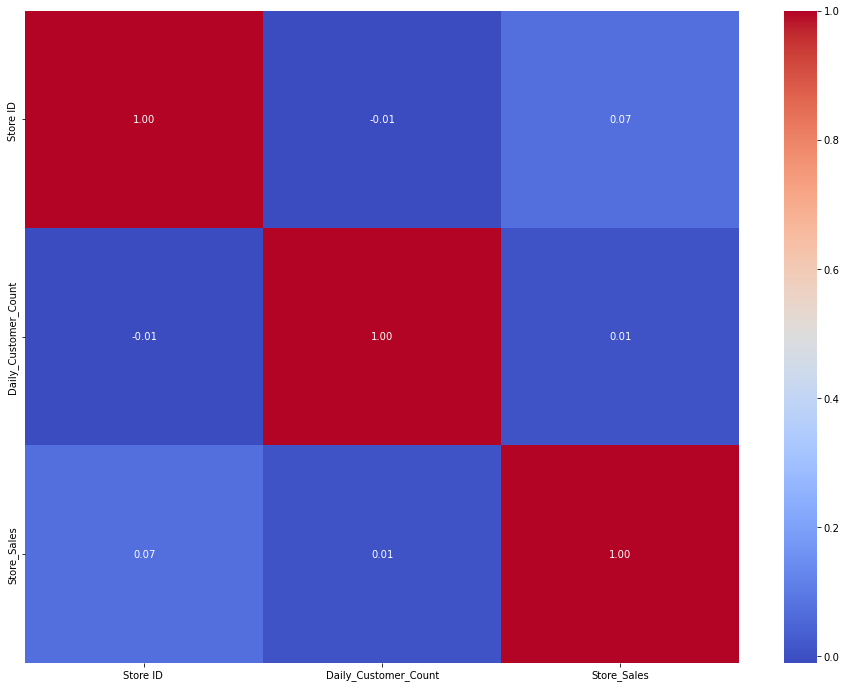

In [163]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_new2.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

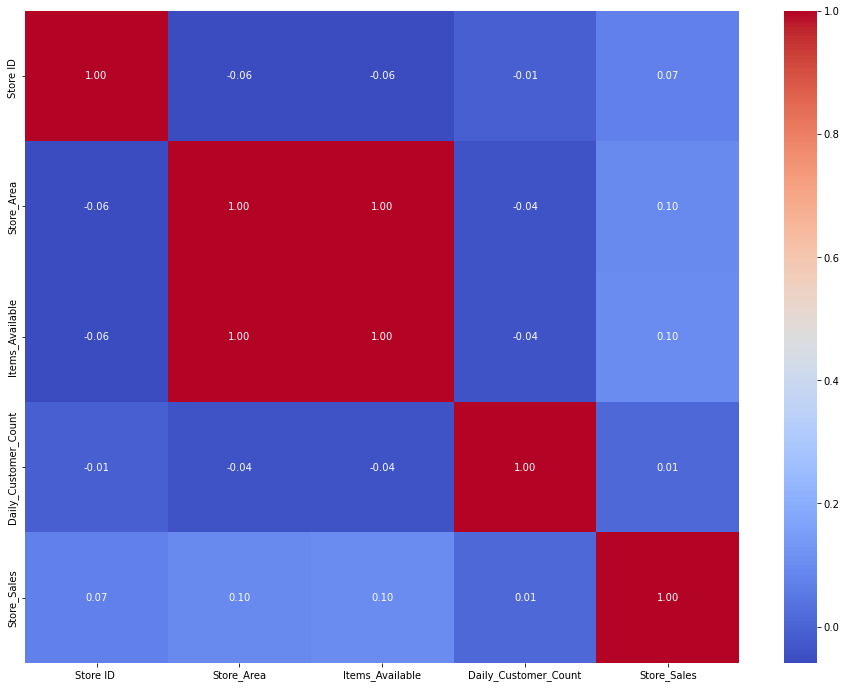

In [164]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [165]:
y = df['Store_Sales']
x = df.drop('Store_Sales', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Store_Sales   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.709
Date:                Thu, 16 Jun 2022   Prob (F-statistic):            0.00530
Time:                        20:45:08   Log-Likelihood:                -10001.
No. Observations:                 896   AIC:                         2.001e+04
Df Residuals:                     891   BIC:                         2.004e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.582e+04   4082.279     11.224      0.000    3.78e+04    5.38e+04
Store ID                 5.0468      2.215      2.278      0.023       0.699       9.395
Store_Area             -31.8193     48.580     -0.655      0.513    -127.164      63.525
Items_Available         32.4639     40.531      0.801      0.423     -47.084     112.012
Daily_Customer_Count     0.8687      2.154      0.403      0.687      -3.360       5.097
==============================================================================
Omnibus:                       16.508   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.188
Skew:                           0.143   Prob(JB):                      0.00372
Kurtosis:                       2.533   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
y = df['Daily_Customer_Count']
x = df.drop('Daily_Customer_Count', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Daily_Customer_Count   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.4776
Date:                  Thu, 16 Jun 2022   Prob (F-statistic):              0.752
Time:                          20:45:08   Log-Likelihood:                -6270.7
No. Observations:                   896   AIC:                         1.255e+04
Df Residuals:                       891   BIC:                         1.258e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             848.3627     61.572     13.778      0.000     727.519     969.206
Store ID           -0.0145      0.035     -0.419      0.675      -0.082       0.053
Store_Area         -0.2470      0.756     -0.327      0.744      -1.730       1.236
Items_Available     0.1677      0.630      0.266      0.790      -1.070       1.405
Store_Sales         0.0002      0.001      0.403      0.687      -0.001       0.001
==============================================================================
Omnibus:                        3.668   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.238
Skew:                           0.073   Prob(JB):                        0.198
Kurtosis:                       2.744   Cond. No.                     4.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
y = df['Items_Available']
x = df.drop('Items_Available', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Items_Available   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.007e+05
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:45:09   Log-Likelihood:                -3641.0
No. Observations:                 896   AIC:                             7292.
Df Residuals:                     891   BIC:                             7316.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6898      3.603      0.191      0.848      -6.383       7.762
Store ID                 0.0033      0.002      1.802      0.072      -0.000       0.007
Store_Area               1.1971      0.002    629.743      0.000       1.193       1.201
Daily_Customer_Count     0.0005      0.002      0.266      0.790      -0.003       0.004
Store_Sales           2.216e-05   2.77e-05      0.801      0.423   -3.21e-05    7.65e-05
==============================================================================
Omnibus:                        0.208   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.235
Skew:                           0.036   Prob(JB):                        0.889
Kurtosis:                       2.969   Cond. No.                     4.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
result.params

const                   0.689773
Store ID                0.003301
Store_Area              1.197096
Daily_Customer_Count    0.000474
Store_Sales             0.000022
dtype: float64

In [169]:
result.model.exog_names

['const', 'Store ID ', 'Store_Area', 'Daily_Customer_Count', 'Store_Sales']

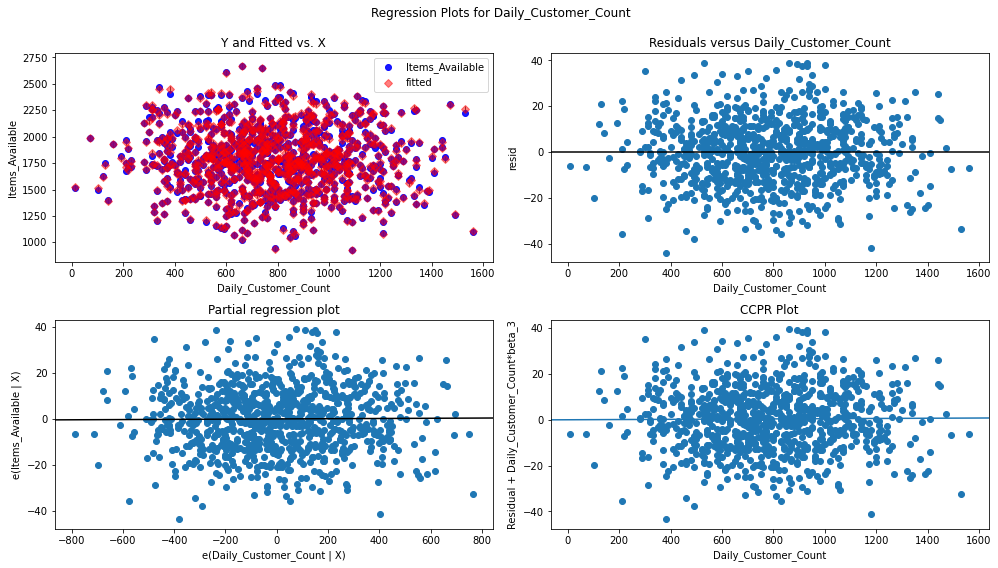

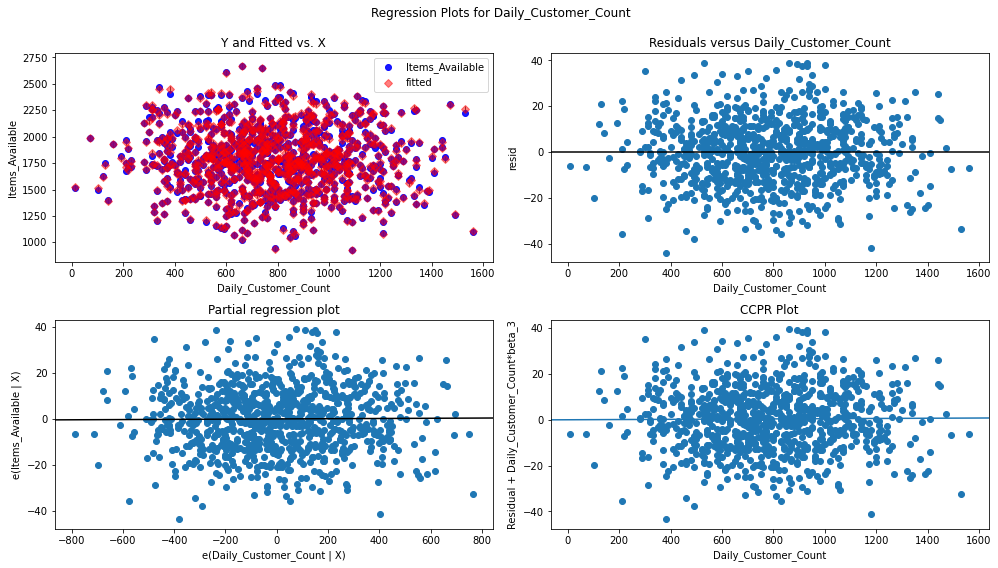

In [170]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'Daily_Customer_Count', fig=fig)

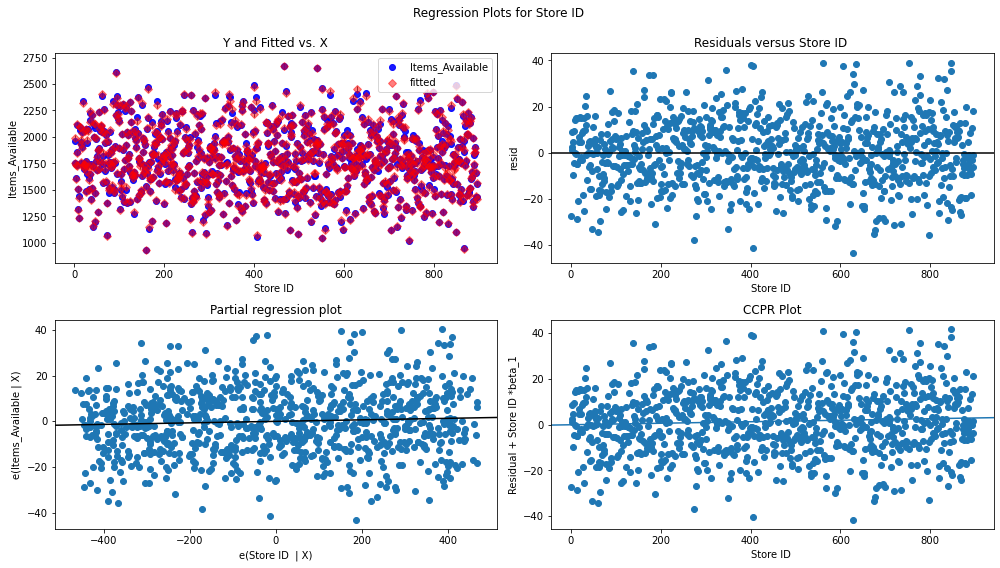

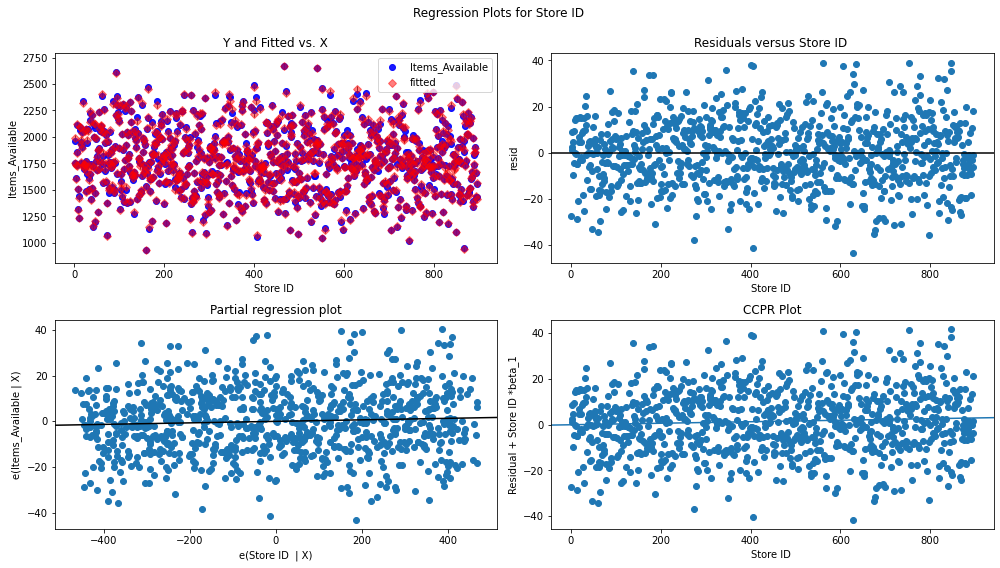

In [171]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'Store ID ', fig=fig)

In [172]:

het_goldfeldquandt(result.model.endog, result.model.exog)

(1.1306080137022254, 0.0984005382000858, 'increasing')

In [173]:
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns[1:]]

In [174]:
x.columns

Index(['const', 'Store ID ', 'Store_Area', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

Мультиколиниарность (если меньше 100 то все ок )

In [175]:
vif

[1.0097396897394413,
 1.0159325504322052,
 1.0020646893027334,
 1.0159184986833254]

In [176]:
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
tol

[0.017133194809961116,
 0.9903542568065691,
 0.9843173147415869,
 0.997939564855668,
 0.9843309293964462]